**Домашнее задание «Проблема качества данных»**

**Цель:** применить на практике методы по оценке качества данных.\
**Описание задания:**\
В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по ссылке или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

**1. Получите и загрузите данные.**

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np 
import missingno as msno
import seaborn as sns

In [146]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.**

In [148]:
titanic.dropna(inplace = True)

In [149]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [150]:
model = LogisticRegression()

In [151]:
X = titanic[['Pclass', 'Age', 'SibSp','Parch','Fare']]
X.head()

,Pclass,Age,SibSp,Parch,Fare
1,1,38.0,1,0,71.2833
3,1,35.0,1,0,53.1000
6,1,54.0,0,0,51.8625
10,3,4.0,1,1,16.7000
11,1,58.0,0,0,26.5500


In [152]:
y = titanic['Survived']
y.head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True , stratify = y, test_size=0.2, random_state=42)

In [154]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [155]:
model.score(X_test, y_test)

0.7027027027027027

Низкий результат

**3. Снова загрузите полные данные.**

In [156]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

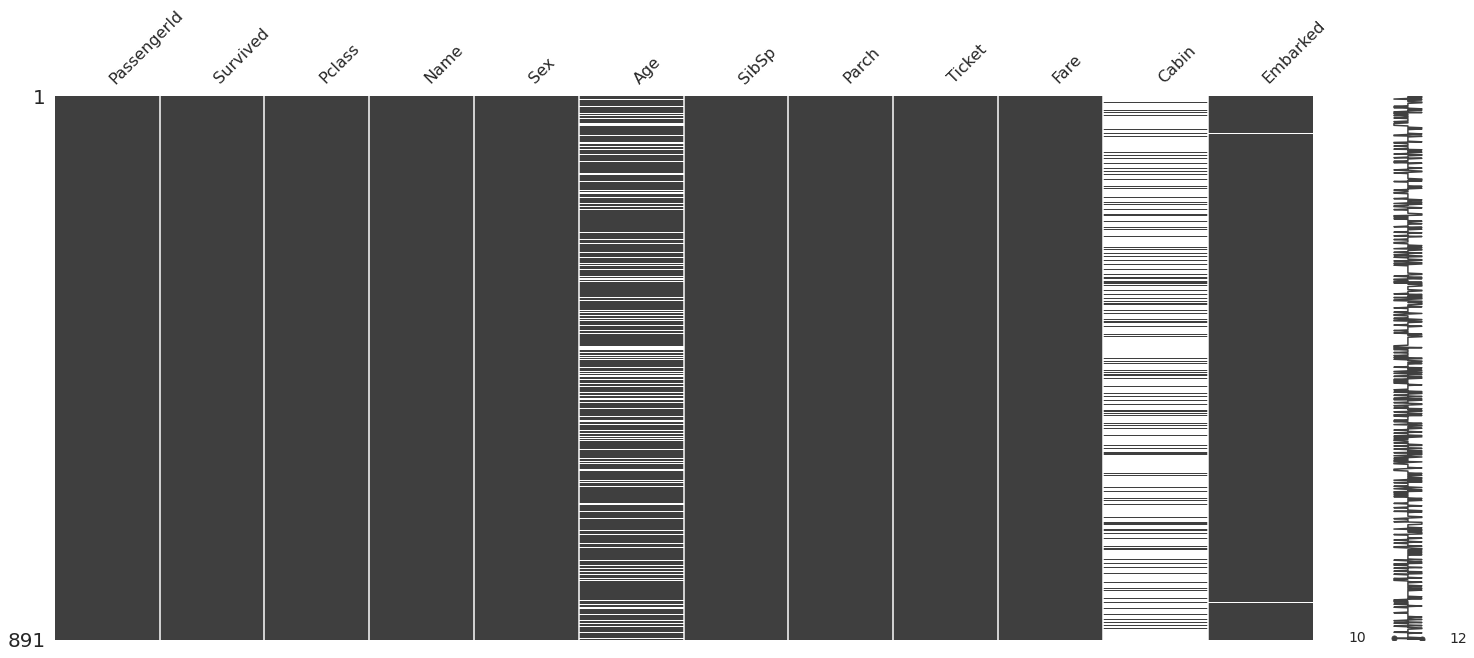

In [157]:
msno.matrix(titanic)

**4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.**

Признак 'Cabin' можно удалить, потому что там много пропусков и он, скорее всего, не информативен для нас. Даже если предположить, что расположение кабины (которое теоретически может влиять на целевую переменную) завиcит от её названия, то здесь более информативным будет 'Pclass'.

'PassengerId' просто номера пассажиров на мне нужны.

'Embarked' - в каком городе пассажир сел на Титаник. Возможно, это тоже нзначения не имеет, но мы можем построить график, чтобы убедиться.

Text(0.5, 1.0, 'Количество выживших в зависимости от места посадки на Титаник')

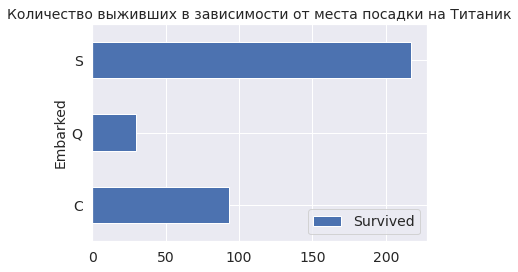

In [158]:
survived_by_embarked = titanic[['Embarked', 'Survived']].groupby('Embarked').sum()
survived_by_embarked.plot(kind='barh', fontsize = 14)
plt.ylabel('Embarked', fontsize = 14)
plt.legend(fontsize = 14)
plt.title('Количество выживших в зависимости от места посадки на Титаник', fontsize = 14)

Не будем удалять этот столбец, потому что он может влиять на целевую переменную.

Посмотрим на переменную 'Ticket'.

In [159]:
titanic['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

Есть ощущение, что эта переменная не существенна.

Переменная 'Name' не имеет значения, потому что в большинстве своём содержит уникальные значения.

In [160]:
titanic['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

In [161]:
titanic.drop(columns=['Cabin', 'PassengerId','Ticket', 'Name'], inplace = True)

In [162]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


5. Проверьте данные на наличие пропущенных значений.\
a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.\
b) Заполните пропуски: 
- средним значением; 
- константой; 
- классом, указывающим на то, что значение было пропущено; случайным числом.\
Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [163]:
isna = titanic.isna().sum().sum()

print(f'Процент пропущенных данных: {round(isna/titanic.shape[0] * 100, 2)}%')

Процент пропущенных данных: 20.09%


Заполним признак 'Age' средним значением.

In [164]:
titanic['Age'] = titanic['Age'].fillna(titanic.groupby('Sex')['Age'].transform('median'))

In [165]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Остался признак 'Embarked' с 2-мя пустыми значениями.

In [166]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Заполним их наиболе часто встречающимся.

In [167]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'] == 'S')

In [168]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


**6. Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.**

In [169]:
X = pd.get_dummies(titanic.loc[:, ['Pclass', 'Sex', 'Age','SibSp','Parch', 'Fare', 'Embarked']])
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_False,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,1


In [170]:
y = titanic['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

**7. Проверьте данные на наличие выбросов.\
a) Удалите выбросы, если считаете это целесообразным. Обоснуйте.**

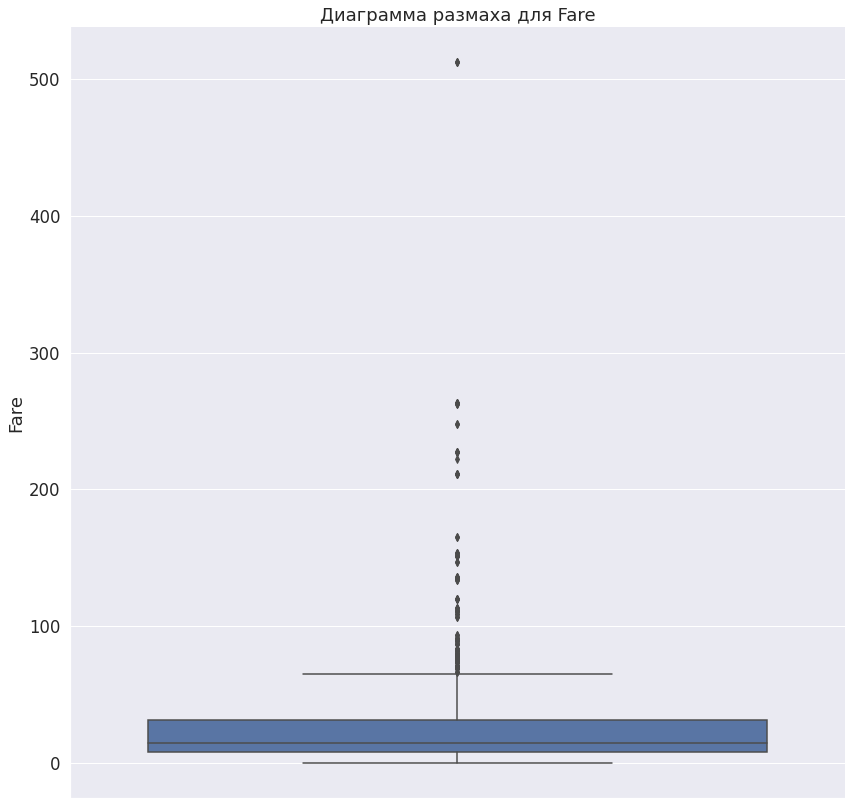

In [171]:
sns.set(font_scale = 1.5)
g = sns.catplot(y ='Fare',
                kind='box',
                data = titanic).set(title = 'Диаграмма размаха для Fare')

g.fig.set_figwidth(15)
g.fig.set_figheight(12)

Есть выбросы (в пределах возможного), но поскольку это плата за проезд, это может оказаться существенным показателем для целевой переменной.

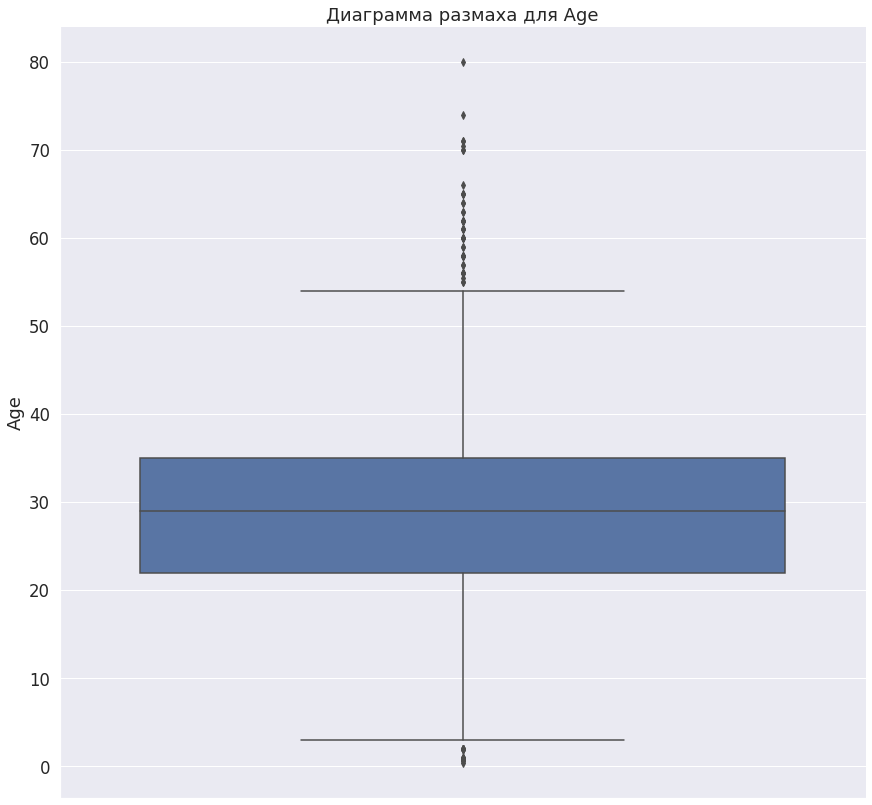

In [172]:
sns.set(font_scale = 1.5)
g = sns.catplot(y ='Age',
                kind='box',
                data = titanic).set(title = 'Диаграмма размаха для Age')

g.fig.set_figwidth(15)
g.fig.set_figheight(12)

Есть совсем малыши и очень пожилые пассажиры, значения показателя находятся в пределах возможного, поэтому мы оставим все значения.

**8. *Постройте 1-2 графика на выбор.
Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)**

In [173]:
def plot_catplot(x, y, h):
    '''Функция для визуализации распределения количественных признаков по категориям'''
    sns.set(font_scale = 1.5)
    g = sns.catplot(x =x,
                    y =y,
                    hue = h,
                    data = titanic).set(title=f'Распределение {y} по {x} среди {h}')

    g.fig.set_figwidth(20)
    g.fig.set_figheight(12)

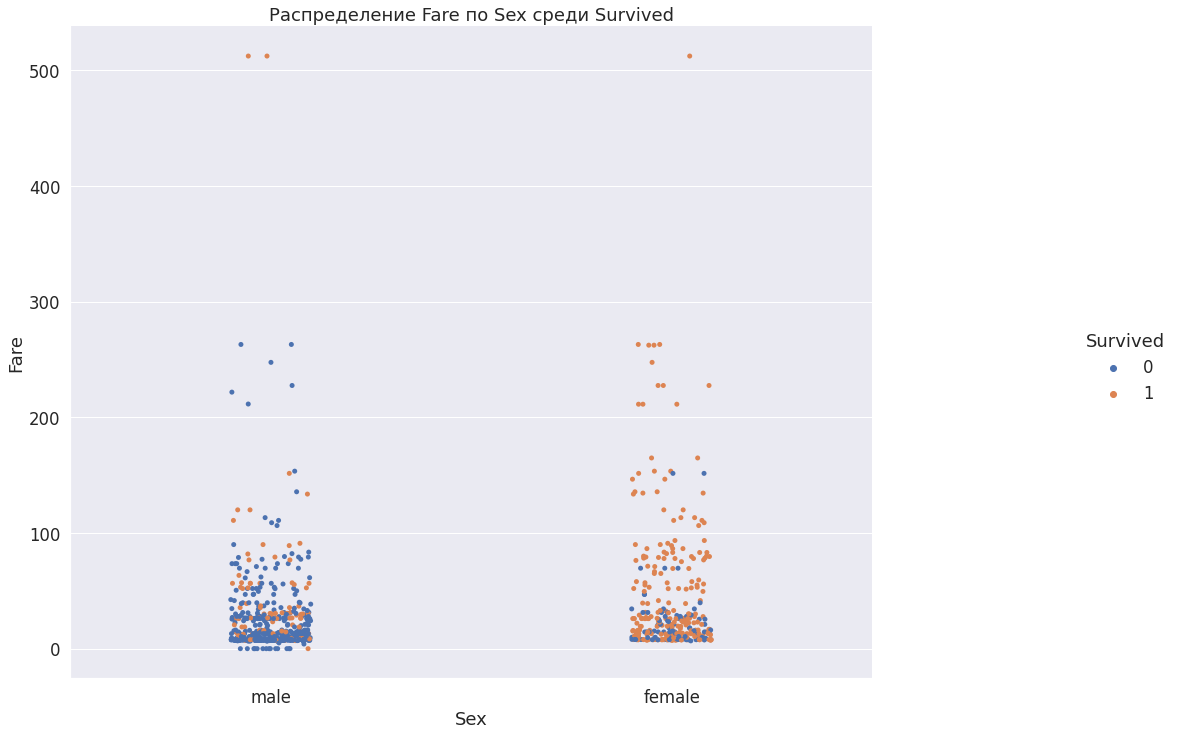

In [174]:
plot_catplot('Sex','Fare','Survived')

Во-первых, сразу видно, что женщинам на этом корабле повезло больше, а во-вторых, те, кто заплатил очень много денег, очевидно окупили свой билет сполна. Мужчин было больше, но их спаслось меньше. Возможно, большинство их них были дети.

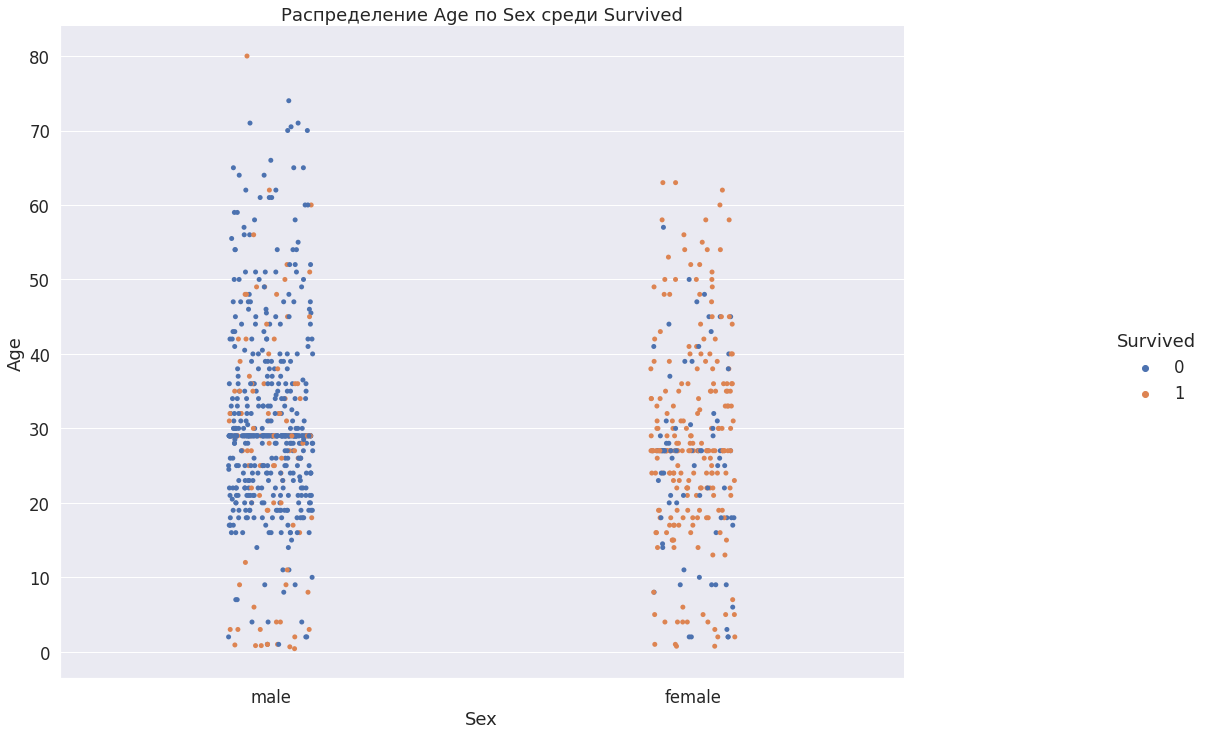

In [175]:
plot_catplot('Sex','Age','Survived')

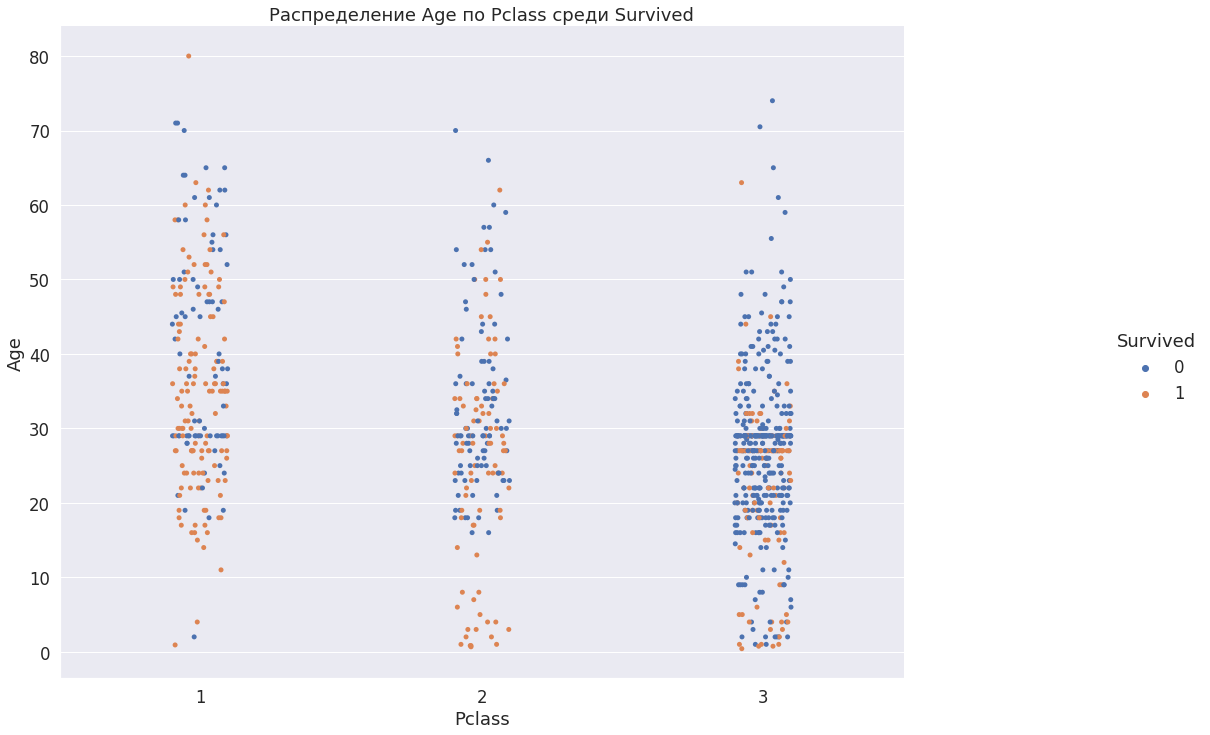

In [176]:
plot_catplot('Pclass','Age','Survived')

Признак, указывающий класс пассажира, существенно влияет на целевую переменную. Так же можно наблюдать некую зависимость целевой переменной от возраста. Правда, детям, которые шли 3-им классом повезло меньше, к сожалению. 

**9.*Попробуйте математически преобразовать признак Age.**

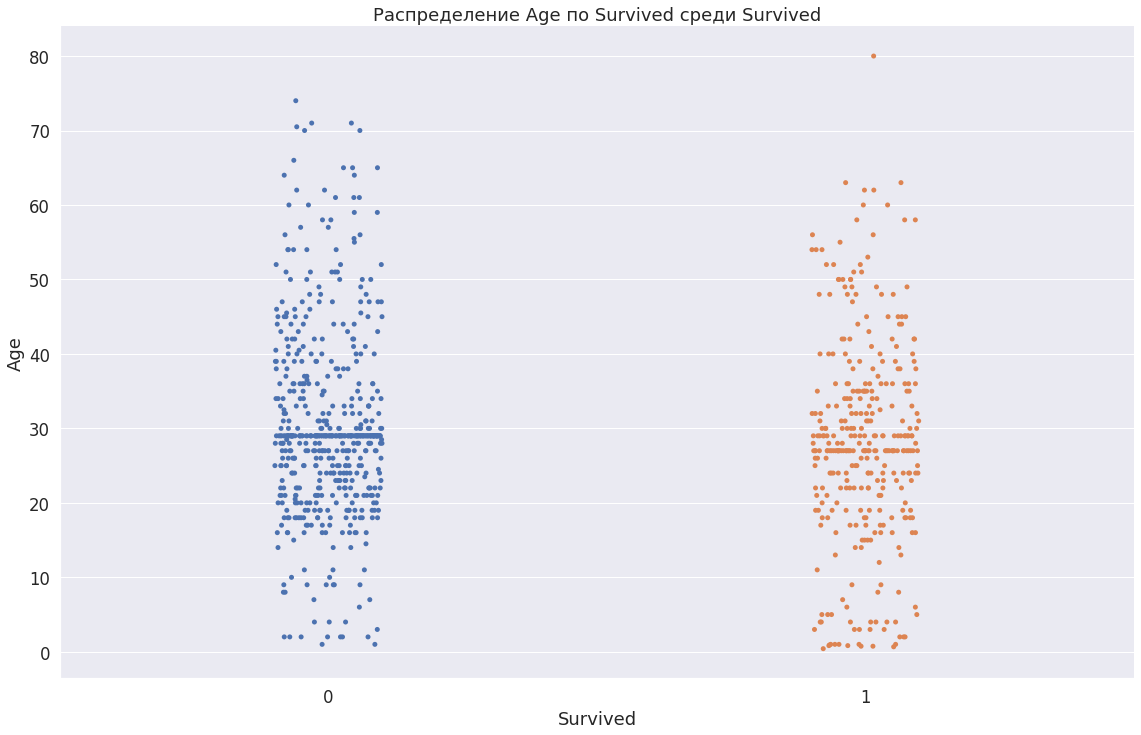

In [177]:
plot_catplot('Survived','Age','Survived')

In [178]:
def age_category(param):
    if param <= 1:
        return '1_infant'
    elif param <= 10:
        return '2_kid'
    elif param <= 18:
        return '3_teenager'
    elif param <= 30:
        return '4_youth'
    elif param <= 45:
        return '5_adult'
    elif param <= 60:
        return '6_mature'
    elif param <= 80:
        return '7_old'
    else:
        return '8_long - lived'

In [179]:
titanic['Age_category'] = titanic['Age'].apply(age_category)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_category
0,0,3,male,22.0,1,0,7.2500,S,4_youth
1,1,1,female,38.0,1,0,71.2833,C,5_adult
2,1,3,female,26.0,0,0,7.9250,S,4_youth
3,1,1,female,35.0,1,0,53.1000,S,5_adult
4,0,3,male,35.0,0,0,8.0500,S,5_adult


. 

**10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.**

In [180]:
X = pd.get_dummies(titanic.loc[:, ['Pclass','Sex', 'Age', 'SibSp','Parch','Fare', 'Embarked',  'Age_category']])
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_False,Embarked_C,Embarked_Q,Embarked_S,Age_category_1_infant,Age_category_2_kid,Age_category_3_teenager,Age_category_4_youth,Age_category_5_adult,Age_category_6_mature,Age_category_7_old
0,3,22.0,1,0,7.2500,0,1,0,0,0,1,0,0,0,1,0,0,0
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,1,0,0,0,1,0,0,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,0,0,0,0,1,0,0
4,3,35.0,0,0,8.0500,0,1,0,0,0,1,0,0,0,0,1,0,0


In [181]:
y = titanic['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [182]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [183]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000000))

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [185]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [186]:
df_compare = pd.DataFrame ([y_test.values, y_pred]).T
df_compare.columns = ['income', 'target']
df_compare

,income,target
0,1,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
174,0,0
175,0,0
176,1,0
177,1,1


In [187]:
model.score(X_test, y_test)

0.8156424581005587

Метрика качества модели значительно повысилась

11. Сформулируйте выводы по проделанной работе. \
a) Кратко опишите какие преобразования были сделаны и почему.\
b) Сравните метрики моделей из п. 2 и п. 10.\
c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. \
*Нужно ли аналогичным образом исследовать и дополнять действительно большие данные? 

a. 
- Были удалены не влияющие на целевую переменную столбцы. Потому что они создают ненужный шум в данных при обучении модели. 
- Были заполнены недостающие значения в признаках Age и Embarked. Что бы не потерять существенное количество данных
- Категория Age была преобразована в категриальную, потому что наблюдается некоторая зависимость целевой переменной от категории. Другие метматические преобразования не делались, потому что позже была применена стандартизация из библиотеки. Любопытно, что если попробовать обучить модель без этой категориальной переменной, то метрика качества получается чуть ниже.
- Были стандартизированы количественные признаки.

b. После работы с признаками и преобразований метрика качества модели значительно повысилась.

с. Работа с данными безусловно целесообразна. Действительно большие данные нужно исследовать. Дополнять при необходимости. Думаю, что надо рассматривать каждый случай конкретно. Зависит от ресурсов, задачи и самих данных.